###IMPORTING NECESSARY LIBRARIES AND FILE UPLOADING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving train_loan.csv to train_loan (2).csv


In [2]:
loan = pd.read_csv('/content/train_loan.csv')
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###FIND MISSING VALUES

In [4]:
#As loan id doesn't provide any relationship to the data we are dropping that column

loan = loan.drop(['Loan_ID'], axis=1)
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan.isna().sum() ##identify the total number of missing values in each columns

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


###FILL THE MISSING VALUES

In [6]:
##Seperating numerical and categorical features

## For numerical columns
num_feature = [features for features in loan.columns if loan[features].dtypes!="O"]
print("Numerical Columns are : ", num_feature,"\n")

## For categorical columns
cat_feature = [features for features in loan.columns if loan[features].dtypes=="O"]
print("Categorical Columns are : ", cat_feature)


# filling with mode for categorical values

for i in cat_feature:
    loan[i] = loan[i].fillna(loan[i].mode()[0])


# filling with median for numerical values

for i in num_feature:
   loan[i] = loan[i].fillna(loan[i].median())



#Again Checking for Null values

loan.isna().sum()

Numerical Columns are :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 

Categorical Columns are :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [7]:
loan.duplicated().sum() ## to check if there exist duplicates.

0

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


###OUTLIER DETECTION

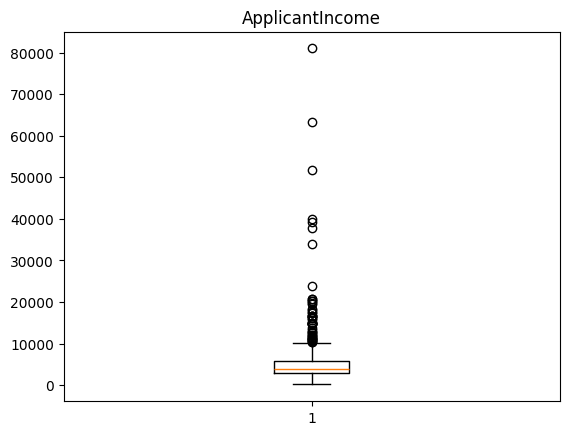

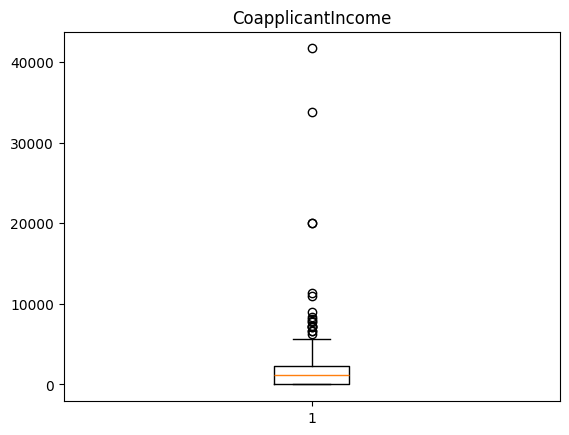

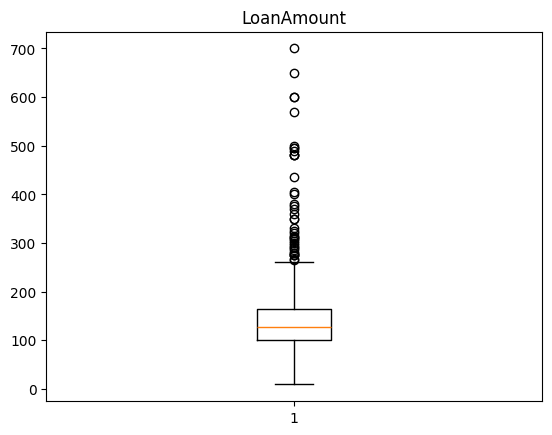

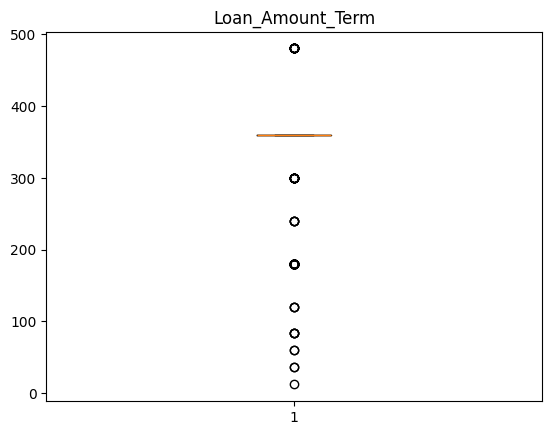

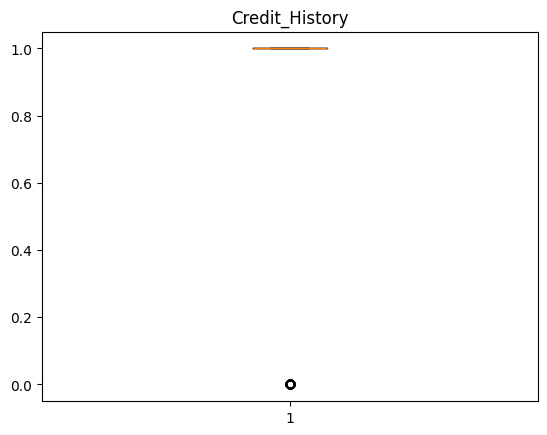

In [9]:
##Outlier detection

for i in num_feature:
    plt.boxplot(loan[i])
    plt.title(i)
    plt.show()


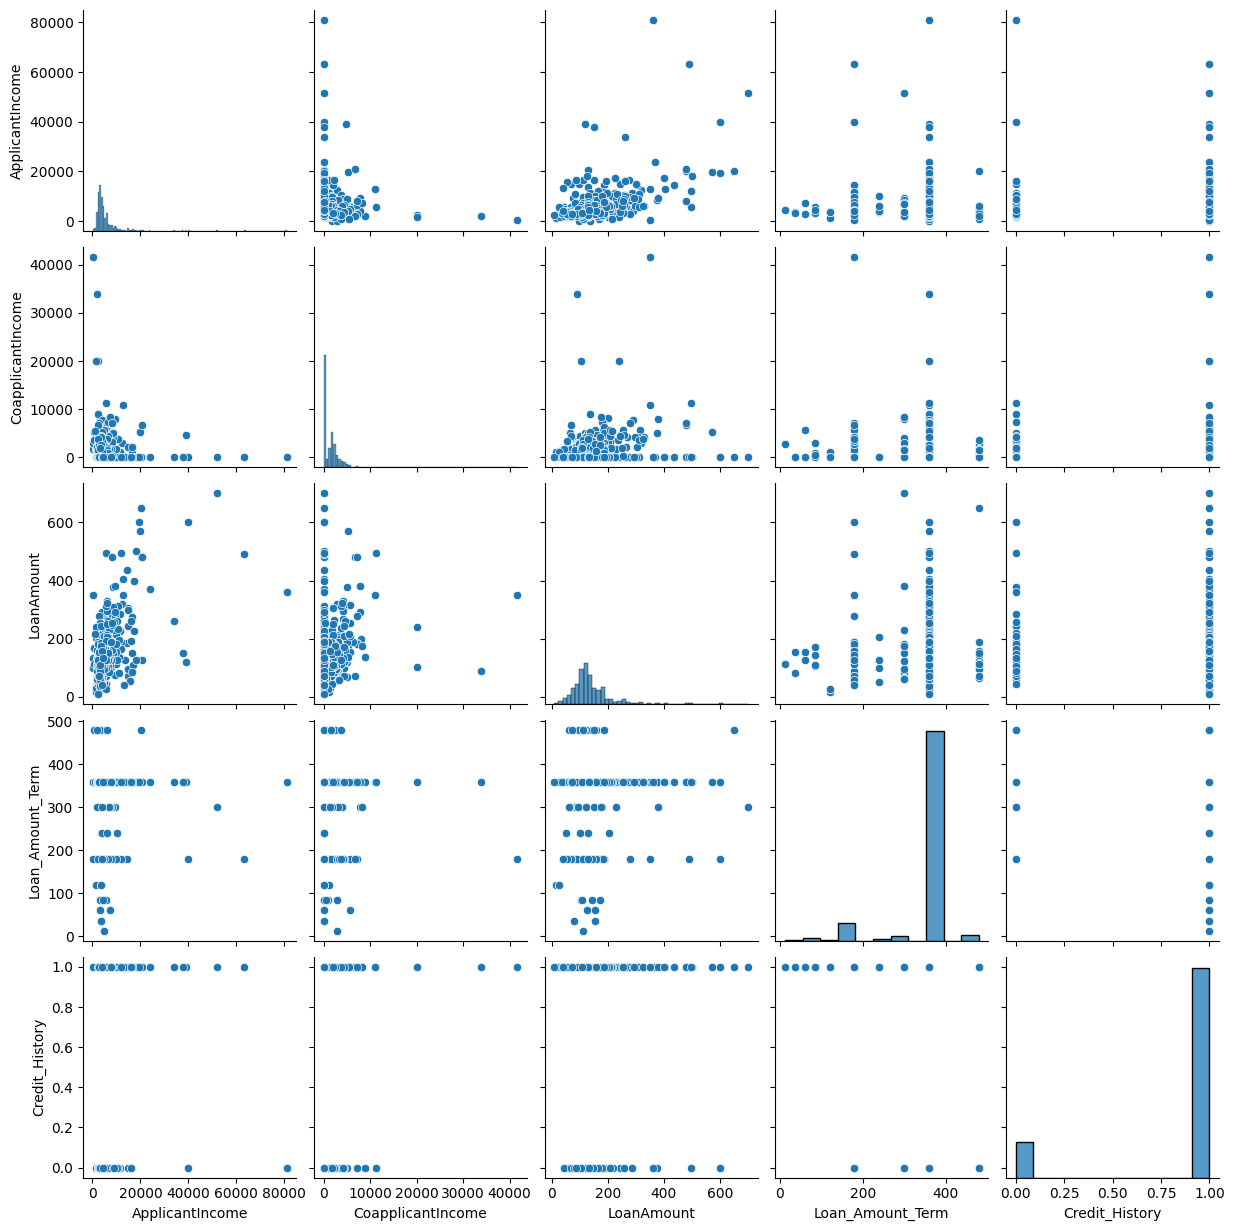

In [10]:
## Pairplot is used to identify the outlier so as to conclude whether to remove outlier or not.

sns.pairplot(loan)
plt.show()

From pairplot we could understand that outlier seems to be less affecting and also may be removal of it can affect the efficiency of data. So we are not removing outliers from the data.

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

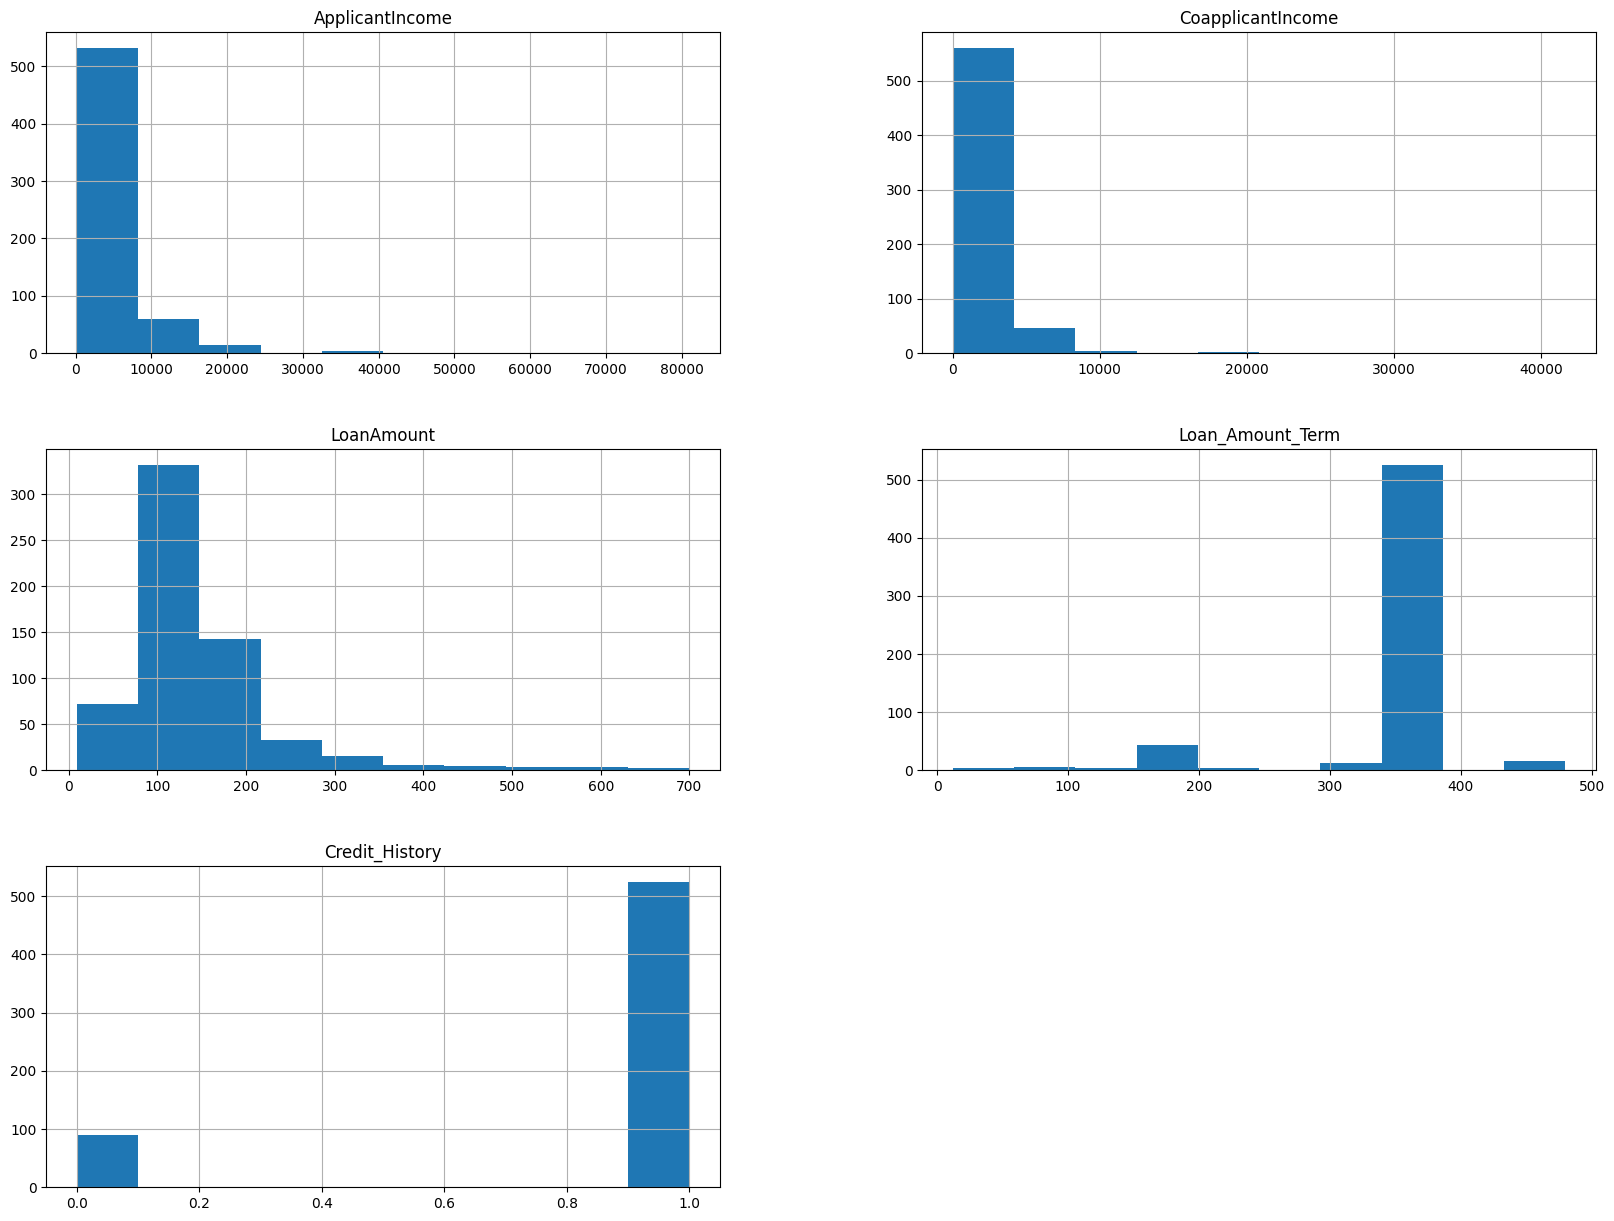

In [11]:
#Frequency graph is used for visualization of the attributes in dataset

freq_graph = loan.select_dtypes(include = ["float", "int"])
freq_graph.hist(figsize = (20, 15))

In [12]:
## Checking Skewness

for i in num_feature:
    skew_data = loan[i].skew()
    print(i,":", skew_data)

ApplicantIncome : 6.539513113994625
CoapplicantIncome : 7.491531216657306
LoanAmount : 2.743052748820892
Loan_Amount_Term : -2.4021122563890396
Credit_History : -2.0219705924848985


###ENCODING THE DATASET

In [13]:
loan.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [14]:
##Identifying the unique values in categorical columns

for i in cat_feature:
    print("Unique values of ",i," are : ",loan[i].nunique(),"\n")

Unique values of  Gender  are :  2 

Unique values of  Married  are :  2 

Unique values of  Dependents  are :  4 

Unique values of  Education  are :  2 

Unique values of  Self_Employed  are :  2 

Unique values of  Property_Area  are :  3 

Unique values of  Loan_Status  are :  2 



As the number of unique values are countable they are easy to be encoded using label coder, which assigns a value for each.

In [15]:
## LABEL ENCODING

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_feature:
    loan[i] = le.fit_transform(loan[i])
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


###SCALING THE DATASET

In [16]:
##As we don't scale encoded columns, dropping encoded columns
##As the value ranges from 0 to 5000, standard scaling helps to rescale values to a range 0 to 1

from sklearn.preprocessing import StandardScaler

stdclr = StandardScaler()
loan.loc[:,num_feature] = stdclr.fit_transform(loan[num_feature]) #selecting the numerical columns to be scaled
loan.head()

<ipython-input-16-1b1562919aa7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 7.29908229e-02 -1.34411954e-01 -3.93747337e-01 -4.62062470e-01
  9.77284368e-02  2.21831139e-03 -5.03018784e-01 -3.87849628e-01
 -2.28939128e-01  1.21845703e+00 -3.60982286e-01 -4.75659966e-01
 -3.81788093e-01 -5.81654908e-01 -6.72414101e-01 -7.42880841e-02
 -2.96107483e-01 -3.10196456e-01 -8.46090753e-02 -4.59277440e-01
  3.69678365e-01  9.03563002e-02 -4.59277440e-01 -3.33951118e-01
 -2.76284627e-01  6.80946355e-01 -4.26676214e-01 -1.92897571e-01
 -6.48987089e-01 -2.70878394e-01 -2.02727086e-01 -3.66388519e-01
 -1.16555001e-01 -3.11834708e-01  1.16259261e+00 -5.12520649e-01
 -5.85750540e-01 -2.84475890e-01 -2.02727086e-01 -2.71206044e-01
 -2.95452182e-01 -5.90337647e-01 -4.92042492e-01 -2.39587769e-01
 -1.16063525e-01 -3.26578981e-01  4.02257712e-02  6.84037156e-02
 -4.51905304e-01 -2.29922079e-01 -5.69368014e-01 -3.79658365e-01
 -

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2,1


###SPLITTING TARGET AND FEATURE COLUMNS

In [17]:
x = loan.drop('Loan_Status',axis=1)
y = loan['Loan_Status']

###TRAIN TEST DATA SPLIT

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

###APPLYING ENSEMBLE LEARNING TECHNIQUES

In [19]:
##IMPORTING METHODS THAT CAN CHECK THE ACCURACY

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

######1) BAGGING CLASSIFIER

In [20]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc.fit(x_train, y_train)
y_pred_bc = bc.predict(x_test)
acc_bc = accuracy_score(y_test, y_pred_bc)
print("Accuracy for Bagging Classifier = ",acc_bc)

Accuracy for Bagging Classifier =  0.7398373983739838


In [21]:
from sklearn.svm import SVC

bagg_clf = BaggingClassifier(estimator = SVC(), n_estimators=100, random_state=42)
bagg_clf.fit(x_train, y_train)
y_pred_bagg = bagg_clf.predict(x_test)
acc_bagg = accuracy_score(y_test, y_pred_bagg)
print("Accuracy for Bagging Classifier model with SVC estimator = ",acc_bagg)

Accuracy for Bagging Classifier model with SVC estimator =  0.7804878048780488


######2) ADAPTIVE BOOSTING

In [22]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
y_pred_abc = abc.predict(x_test)
acc_abc = accuracy_score(y_test, y_pred_abc)
print("Accuracy for Adaptive Boosting = ",acc_abc)

Accuracy for Adaptive Boosting =  0.7317073170731707


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [23]:
abc_n = AdaBoostClassifier(n_estimators=100)
abc_n.fit(x_train, y_train)
y_pred_abc_n = abc_n.predict(x_test)
acc_abc_n = accuracy_score(y_test, y_pred_abc_n)
print("Accuracy for Ada Boost model with n estimators = ",acc_abc_n)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for Ada Boost model with n estimators =  0.7560975609756098


######3)GRADIENT BOOSTING

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy for Gradient Boost model = ",acc_gb)

Accuracy for Gradient Boost model =  0.7479674796747967


In [25]:
gb1 = GradientBoostingClassifier(n_estimators=100)
gb1.fit(x_train, y_train)
y_pred_gb1 = gb1.predict(x_test)
acc_gb1 = accuracy_score(y_test, y_pred_gb1)
print("Accuracy of Gradient Boost with n estimators = ",acc_gb1)

Accuracy of Gradient Boost with n estimators =  0.7398373983739838


######4) XGBOOST

In [26]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy for XGBoost = ",acc_xgb)

Accuracy for XGBoost =  0.7398373983739838


######5) RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print("Accuracy for random forest model = ",acc_rf)

Accuracy for random forest model =  0.7723577235772358


####The accuracy for different ensemble methods are :

1) Bagging Classifier : 78.04%

2) Adaptive Boosting Classifier : 75.60%

3) Gradient Boosting Classifier : 74.8%

4) XGBoost Classifier : 73.98%

5) Random Forest Classifier : 77.23%


On compairing the values, Bagging classifier gives the highest accuracy so we conclude that as the best model to predict this data.

###CROSS VALIDATION


Cross validation is done to observe the performance of data on different models.
The data is split in different set and then usual train test operations are done to evaluate the accuracy.

In [28]:
## Cross validation score is an estimate of a model's performance on data it hasn't seen before.

from sklearn.model_selection import cross_val_score

###### 1) K-Fold Cross Validation


The data is split into different folds as training and test data set and then evaluate model's performance.

In [29]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
for train_index, test_index in kf.split(x,y):
     print("Training index\n", train_index)
     print("Testing index\n", test_index)

Training index
 [ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 30

In [30]:
##Bagging Classifier

cv_bagg = cross_val_score(bc, x, y, cv=kf)
print("Cross validation score for bagging classifier = ",cv_bagg)


## Calculating mean of result
mean_bagg = np.mean(cv_bagg)
print("\nMean of Cross validation score of Bagging Classfier = ",mean_bagg)
## Mean is used to identify the average error on the data, model with lowest mean can be considered as one of the best model.

Cross validation score for bagging classifier =  [0.72580645 0.74193548 0.75806452 0.64516129 0.73770492 0.75409836
 0.85245902 0.7704918  0.81967213 0.75409836]

Mean of Cross validation score of Bagging Classfier =  0.7559492332099419


In [31]:
## Adaptive Boosting Classifier

cv_abc = cross_val_score(abc, x, y, cv=kf)
print("Cross validation score for Adaptive Boosting Classifier = ",cv_abc)


## Calculating mean of result
mean_abc = np.mean(cv_abc)
print("\nMean of Cross validation score of Adaptive Boosting Classfier = ",mean_abc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross validation score for Adaptive Boosting Classifier =  [0.74193548 0.82258065 0.74193548 0.74193548 0.80327869 0.80327869
 0.86885246 0.80327869 0.7704918  0.78688525]

Mean of Cross validation score of Adaptive Boosting Classfier =  0.7884452670544686


In [32]:
## Gradient Boosting Classifier

cv_gb = cross_val_score(gb, x, y, cv=kf)
print("Cross validation score for Gradient Boosting Classifier = ",cv_gb)


## Calculating mean of result
mean_gb = np.mean(cv_gb)
print("\nMean of Cross validation score of Gradient Boosting Classfier = ",mean_gb)

Cross validation score for Gradient Boosting Classifier =  [0.75806452 0.83870968 0.70967742 0.72580645 0.7704918  0.81967213
 0.90163934 0.78688525 0.75409836 0.83606557]

Mean of Cross validation score of Gradient Boosting Classfier =  0.7901110523532523


In [33]:
## XGBoost Classifier

cv_xgb = cross_val_score(xgb_model, x, y, cv=kf)
print("Cross validation score for XGBoost Classifier = ",cv_xgb)


## Calculating mean of result
mean_xgb = np.mean(cv_xgb)
print("\nMean of Cross validation score of XGBoost Classfier = ",mean_xgb)

Cross validation score for XGBoost Classifier =  [0.75806452 0.74193548 0.75806452 0.70967742 0.80327869 0.78688525
 0.85245902 0.81967213 0.70491803 0.7704918 ]

Mean of Cross validation score of XGBoost Classfier =  0.7705446853516659


In [34]:
## Random Forest Classifier

cv_rf = cross_val_score(rf, x, y, cv=kf)
print("Cross validation score for Random Forest Classifier = ",cv_rf)


## Calculating mean of result
mean_rf = np.mean(cv_rf)
print("\nMean of Cross validation score of Random Forest Classfier = ",mean_rf)

Cross validation score for Random Forest Classifier =  [0.74193548 0.80645161 0.74193548 0.74193548 0.7704918  0.7704918
 0.83606557 0.73770492 0.80327869 0.83606557]

Mean of Cross validation score of Random Forest Classfier =  0.7786356425171866


###### As the data seems to be balanced data, we're not performing stratified cross validation method.

On comparing the mean value of cross validation score of different models:

1) Bagging Classifier : 75%

2) Adaptive Boosting Classifier : 78%

3) Gradient Boosting Classifier : 79%

4) XGBoost Classifier : 77%

5) Random Forest Classifier : 78%

We could conclude that bagging model has the least average error and it is the best model to predict the data.

###HYPERPARAMETER TUNING


After performing all the necessary operations and find out the best model to classify the data, we perform hyperparameter tuning as it ensures that the model could give good predictions.

It is the process of selecting the optimal values for a machine learning model's hyperparameters.
The three hyperparameter tuning methods are:

1) Grid search

2) Random search

3) Bayesian optimization


1) Grid Search

This can be primarily considered for bagging classifiers.

In [35]:
from sklearn.model_selection import GridSearchCV

## Defining hyperparameter space

parameters ={
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    "n_estimators": [100, 200, 300]}

In [36]:
from re import VERBOSE
## Initialization of Grid search

grid_search = GridSearchCV(estimator=bc, param_grid = parameters, cv=5, scoring = "accuracy", verbose = 2, n_jobs = -1)
gscv = grid_search.fit(x_train, y_train)
print("Best parameters are : ", gscv.best_params_)
print("Best score is : ", gscv.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters are :  {'max_samples': 0.1, 'n_estimators': 100}
Best score is :  0.8186353329210471


2) Random Search

In [37]:
from sklearn.model_selection import RandomizedSearchCV

## Initialization of random search cv

random = RandomizedSearchCV(estimator = bc,
          param_distributions = parameters,
          verbose = 1,
          n_jobs = -1,
          n_iter = 18)
rscv = random.fit(x_train, y_train)
print("Best parameters are : ", rscv.best_params_)
print("Best score is : ", rscv.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=18. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters are :  {'n_estimators': 100, 'max_samples': 0.05}
Best score is :  0.8145949288806431


###### While performing grid search and random search the accuracy for both has been 81% indicating that Bagging classifier is the best model with maximum sample 0.05